Car price prediction

In [ ]:
#Importing the librabries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv(r"c:\Users\dinht\OneDrive\Desktop\học data\Học Python\Forecasting\archive\car data.csv")

In [5]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# checking the number of columns and rows
car_dataset.shape

(301, 9)

In [9]:
# checking type of dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
# checking null value of dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# checking the distribution of dataset, unique value of Fuel_Type, Seller_Type, Transmission
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64



Machine learning algorithms typically require numerical input, so categorical data, which is often represented as strings, needs to be converted into numerical format.

In [13]:
# encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type': {'Petrol':0 , 'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" column
car_dataset.replace({'Seller_Type': {'Dealer':0 , 'Individual':1}},inplace=True)

# encoding "Transmission" column
car_dataset.replace({'Transmission': {'Manual':0 , 'Automatic':1}},inplace=True)

C:\Users\dinht\AppData\Local\Temp\ipykernel_25392\3177840587.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol':0 , 'Diesel':1,'CNG':2}},inplace=True)
C:\Users\dinht\AppData\Local\Temp\ipykernel_25392\3177840587.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer':0 , 'Individual':1}},inplace=True)
C:\Users\dinht\AppData\Local\Temp\ipykernel_25392\3177840587.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target, X is indedpendent elements and Y is dependent element

In [16]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [20]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)

Model Training

In [21]:
# Loading the Linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [24]:
# predicting on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Error :', error_score)

R Squared Error : 0.8799451660493699


Visualize the actual prices and Prediced prices

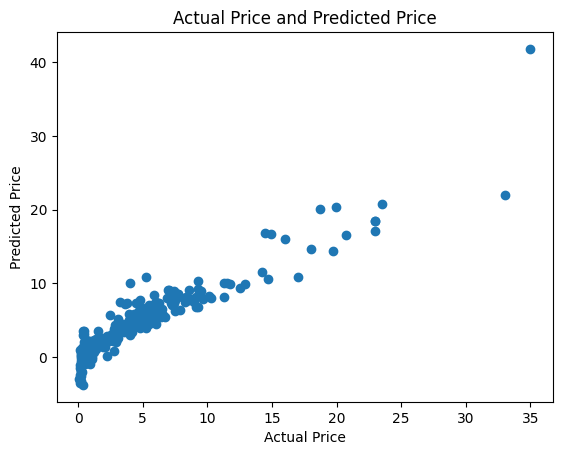

In [26]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price and Predicted Price")
plt.show()

In [28]:
# prediction on Training data (X_test)
test_data_prediction = lin_reg_model.predict(X_test)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026473


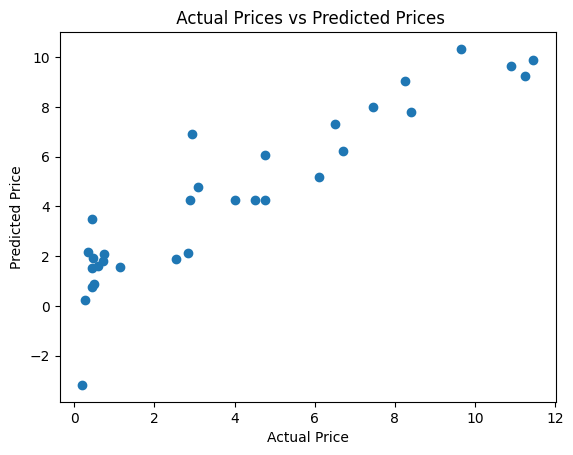

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_train = mean_squared_error(Y_train, training_data_prediction)
mse_test = mean_squared_error(Y_test, test_data_prediction)
mae_train = mean_absolute_error(Y_train, training_data_prediction)
mae_test = mean_absolute_error(Y_test, test_data_prediction)
r2_train = r2_score(Y_train, training_data_prediction)
r2_test = r2_score(Y_test, test_data_prediction)

print("Training Data Metrics:")
print("MSE:", mse_train)
print("MAE:", mae_train)
print("R2:", r2_train)

print("Testing Data Metrics:")
print("MSE:", mse_test)
print("MAE:", mae_test)
print("R2:", r2_test)


Training Data Metrics:
MSE: 3.25903082330912
MAE: 1.2166174093914053
R2: 0.8799451660493699
Testing Data Metrics:
MSE: 2.15012991898439
MAE: 1.1516382156616387
R2: 0.8365766715026473


Getting the Model Coefficients and Intercept

In [42]:
car_dataset_corr = car_dataset.drop(['Car_Name'],axis=1)

In [43]:
correlation = car_dataset_corr.corr()

<Axes: >

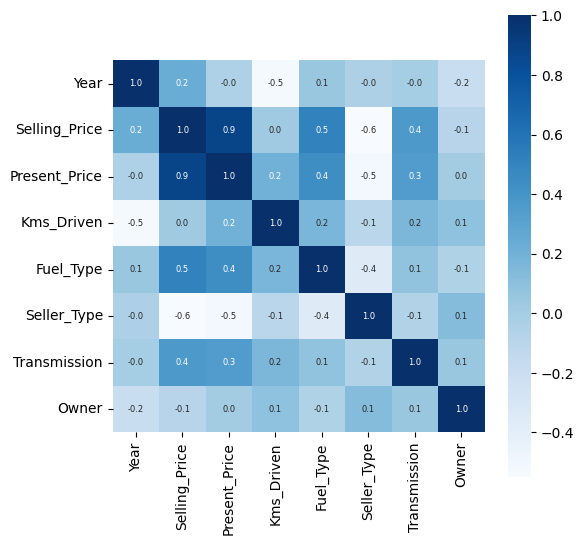

In [47]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':6}, cmap='Blues')

In [34]:
# Get the intercept (beta_0)
intercept = lin_reg_model.intercept_

# Get the coefficients (beta_1, beta_2, ..., beta_n)
coefficients = lin_reg_model.coef_

# Print the intercept and coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Formulate the equation string
feature_names = X.columns
equation = f"Y = {intercept:.2f} "
for coef, name in zip(coefficients, feature_names):
    equation += f"+ ({coef:.2f} * {name}) "

print("Regression Equation:")
print(equation)


Intercept: -823.0159622143797
Coefficients: [ 4.09426126e-01  4.38728846e-01 -6.73100388e-06  1.76308349e+00
 -1.00417660e+00  1.50736348e+00 -8.74133473e-01]
Regression Equation:
Y = -823.02 + (0.41 * Year) + (0.44 * Present_Price) + (-0.00 * Kms_Driven) + (1.76 * Fuel_Type) + (-1.00 * Seller_Type) + (1.51 * Transmission) + (-0.87 * Owner) 


Using the Model Directly for Prediction

In [36]:
# Example: Predicting the price of a new car data point
new_data = pd.DataFrame({
    'Year': [2020],
    'Present_Price': [10],
    'Kms_Driven': [25000],
    'Fuel_Type': ['Petrol'],
    'Seller_Type': ['Dealer'],
    'Transmission': ['Manual'],
    'Owner': [0]
})

new_data


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2020,10,25000,Petrol,Dealer,Manual,0


In [37]:
# Assuming 'new_data' has been preprocessed similarly to 'X'
new_data_encoded = pd.get_dummies(new_data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
new_data_encoded = new_data_encoded.reindex(columns = X.columns, fill_value=0)

# Predicting the selling price
predicted_price = lin_reg_model.predict(new_data_encoded)
print("Predicted Selling Price:", predicted_price[0])

Predicted Selling Price: 8.243826514437956
